In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from fxcmtoken import major_forex_pairs
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
path = 'log_files'
portfolio = pd.DataFrame()
for i in range(19, 25):
    if i < 10:
        file_name = f'2021_12_0{i}_PortfolioLog.csv'
    else:
        file_name = f'2021_12_{i}_PortfolioLog.csv'
    file_path = os.path.join(path, file_name)
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, parse_dates=['date'], index_col=['date'])
        if portfolio.empty:
            portfolio = data
        else:
            portfolio = pd.concat([portfolio, data])
portfolio['return'] = np.log(portfolio['equity']/ portfolio['equity'].shift(1))
display(portfolio.head())
display(portfolio.tail())
print(portfolio.shape)

,balance,equity,dayPL,usdMr,usableMargin,return
date,,,,,,
2021-12-19 23:10:46.462372+00:00,18885.84,18885.84000,0.00000,0.00,18885.84000,NaN
2021-12-19 23:15:56.426015+00:00,18885.84,18876.85445,-8.98555,104.75,18772.10445,-0.000476
2021-12-19 23:21:41.257332+00:00,18885.84,18881.97078,-3.86922,121.00,18760.97078,0.000271
2021-12-19 23:26:23.665558+00:00,18885.84,18877.65260,-8.18740,121.00,18756.65260,-0.000229
2021-12-19 23:30:40.556636+00:00,18885.84,18871.10998,-14.73002,121.00,18750.10998,-0.000347


,balance,equity,dayPL,usdMr,usableMargin,return
date,,,,,,
2021-12-24 17:28:29.314769+00:00,19038.45,19020.77299,-92.24701,121.0,18899.77299,0.000150
2021-12-24 17:30:12.558375+00:00,19038.45,19019.71794,-93.30206,121.0,18898.71794,-0.000055
2021-12-24 17:35:14.336311+00:00,19038.45,19022.25060,-90.76940,121.0,18901.25060,0.000133
2021-12-24 18:00:07.725635+00:00,19038.45,19011.45412,-101.56588,121.0,18890.45412,-0.000568
2021-12-24 18:05:02.128067+00:00,19038.45,19006.09915,-106.92085,121.0,18885.09915,-0.000282


(1338, 6)


In [3]:
print(f"Total return {portfolio['return'].cumsum()[-1] * 100:.2f} %")

Total return 0.63 %


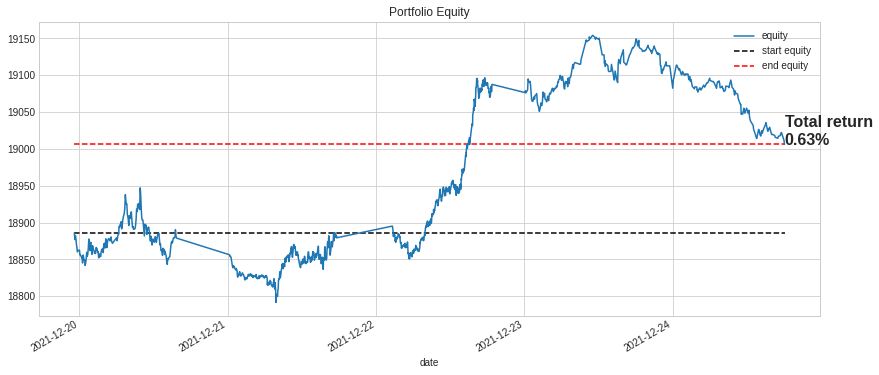

In [4]:
portfolio[['equity']].plot(title = 'Portfolio Equity',)
plt.hlines(portfolio['equity'][0], xmin=portfolio.index[0], xmax=portfolio.index[-1], color='k', linestyle='--', label='start equity')
plt.hlines(portfolio['equity'][-1], xmin=portfolio.index[0], xmax=portfolio.index[-1], color='r', linestyle='--', label='end equity')
plt.text(x=portfolio.index[-1], y=portfolio['equity'][-1], s=f"Total return\n{portfolio['return'].cumsum()[-1] * 100:.2f}%", fontsize=16, fontweight='bold')
plt.legend()
plt.show()

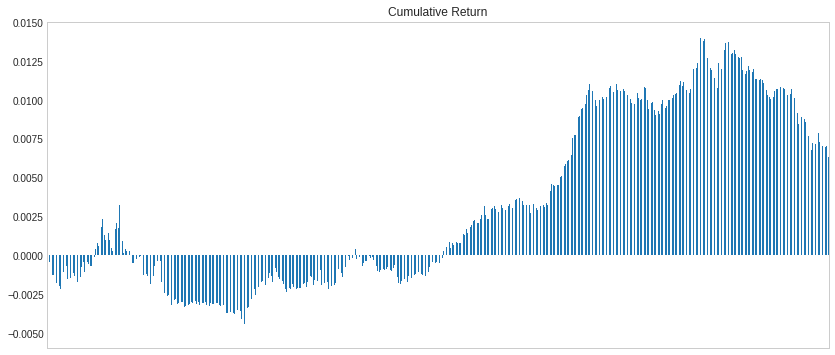

In [5]:
portfolio['return'].cumsum().plot(kind='bar', use_index=False, grid=False, title='Cumulative Return', xticks=[])
plt.show()